In [1]:
#importing all required libraries


import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from scipy import stats
import scipy.stats as stats
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import metrics

In [2]:
#load Data set

df = pd.read_csv("Glass_Identification.csv")
df

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeofglass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#first 5 sample
df.head()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeofglass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.tail(5)   #Last 5 sample

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeofglass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
df.sample(5)  # Random 5 Sample

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeofglass
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
162,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
176,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00,6
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
18,19,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.00,1


In [6]:
#Rows and columns 
print('Number of rows in DataSet:', df.shape[0]," ",'Number of columns in DataSet:', df.shape[1]) 

Number of rows in DataSet: 214   Number of columns in DataSet: 11


# EDA (Exploratory Data Analysis)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           214 non-null    int64  
 1   Ri           214 non-null    float64
 2   Na           214 non-null    float64
 3   Mg           214 non-null    float64
 4   Al           214 non-null    float64
 5   Si           214 non-null    float64
 6   K            214 non-null    float64
 7   Ca           214 non-null    float64
 8   Ba           214 non-null    float64
 9   Fe           214 non-null    float64
 10  Typeofglass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Observation:

There are 2 different Data types in Data set (int,Float)

Data Set is having no Null Values

In [8]:
#Checking Duplicates in dataset

df.duplicated().sum()

0

No Duplicates found in Dataset

In [9]:
#checking null values in Dataset
df.isnull().sum()

Id             0
Ri             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
Typeofglass    0
dtype: int64

No Null Values in Dataset

No Null data is found in dataset so data visualization is not required

In [10]:
df.drop(columns=['Id'],inplace=True)   #as it doesnt affect the dataset


In [11]:
df

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeofglass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The dataset is divided into window glass (classes 1-4) and non-window glass (classes 5-7)- typeofglass

In [13]:
#creat new column
df['glass_type'] = df['Typeofglass'].apply(lambda x: 'window glass' if x in [1, 2, 3, 4] else 'non-window glass')
#delete Type column
df = df.drop(['Typeofglass'], axis = 1)

In [14]:
#creating new column 'Glass_type' basis on the 'typeofglass' column where (1-4 = window_glass & 5-7 non_window_glass)

In [15]:
df['glass_type'].value_counts()

window glass        163
non-window glass     51
Name: glass_type, dtype: int64

Observation:
    
there are 162 values are present in window glass and 51 values are presentin non-window glass that
means the data is imbalanced we have to balance data for further model prediction

In [17]:
#here i am assigning window glass as 1 and non window glass as 0 for further visualization
df['glass_type'] = df['glass_type'].apply(lambda x: 1 if x in 'window glass' else 0)

In [18]:
df.head()  #lets check the Type of glass has been changed or not

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [19]:
df.tail()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,0
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,0
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,0
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,0
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,0


In [20]:
df.sample()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
87,1.51645,13.4,3.49,1.52,72.65,0.67,8.08,0.0,0.1,1


In [21]:
# Describing the Dataset
df.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.761682
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


Observation:

1- The dataset consists of measurements for various chemical elements: RI (Refractive Index), Na (Sodium), Mg (Magnesium), Al (Aluminum), Si (Silicon), K (Potassium), Ca (Calcium), Ba (Barium), Fe (Iron) and glass_type

2- The dataset contains 214 data points for each element, indicating a consistent sample size.

3- The mean values for the elements are as follows: RI = 1.518365, Na = 13.407850, Mg = 2.684533, Al = 1.444907, Si = 72.650935, K = 0.497056, Ca = 8.956963, Ba = 0.175047, Fe = 0.057009 , glass_type = 0.761682

4- The standard deviation values for the elements are as follows: RI = 0.003037, Na = 0.816604, Mg = 1.443408, Al = 0.499270, Si = 0.774546, K = 0.652192, Ca = 1.423153, Ba = 0.497219, Fe = 0.097439 , glass_type= 0.427053

5- The minimum and maximum values for each element are as follows:

RI: min = 1.511150, max = 1.533930
Na: min = 10.730000, max = 17.380000
Mg: min = 0.000000, max = 4.490000
Al: min = 0.290000, max = 3.500000
Si: min = 69.810000, max = 75.410000
K: min = 0.000000, max = 6.210000
Ca: min = 5.430000, max = 16.190000
Ba: min = 0.000000, max = 3.150000
Fe: min = 0.000000, max = 0.510000
glass_type: min = 0.000000, max = 1.000000
6- The dataset includes quartile values (25th, 50th, and 75th percentiles) for each element, providing insights into the distribution of the data.

In [22]:
#checking skewness
df.apply(skew)

Ri            1.614015
Na            0.450992
Mg           -1.144465
Al            0.900918
Si           -0.725317
K             6.505636
Ca            2.032677
Ba            3.392431
Fe            1.742007
glass_type   -1.228398
dtype: float64

Observation:

The feature "K" (Potassium) has a very high positive skewness value of 6.499244. This indicates that the distribution of potassium values is heavily right-skewed, with a long tail on the right side.

The features "Ca" (Calcium), "Ba" (Barium), "Fe" (Iron), and "glass_type" exhibit positive skewness values above 1, indicating right-skewed distributions. Although their skewness values are not as extreme as "K", they still deviate from a symmetric distribution.

The features "RI" (Refractive Index), "Na" (Sodium), and "Al" (Aluminum) have positive skewness values below 1, indicating a slight right-skew in their distributions. However, the skewness values are relatively smaller compared to "K", "Ca", "Ba", "Fe", and "glass_type".

The feature "Mg" (Magnesium) and "Si" (Silicon) exhibit negative skewness values, suggesting left-skewed distributions. However, their skewness values are not as extreme as "K", "Ca", "Ba", "Fe", and "glass_type".

The feature "glass_type" stands out as it has the lowest skewness value of -1.221182, indicating a slightly left-skewed distribution.

In [23]:
# checking the value counts
for column in df.columns:
    print("=================",column,"=================")
    print(df[column].value_counts())

================= Ri =================
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: Ri, Length: 178, dtype: int64
================= Na =================
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
================= Mg =================
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
================= Al =================
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
================= Si =================
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64
==========

# Data Visualization

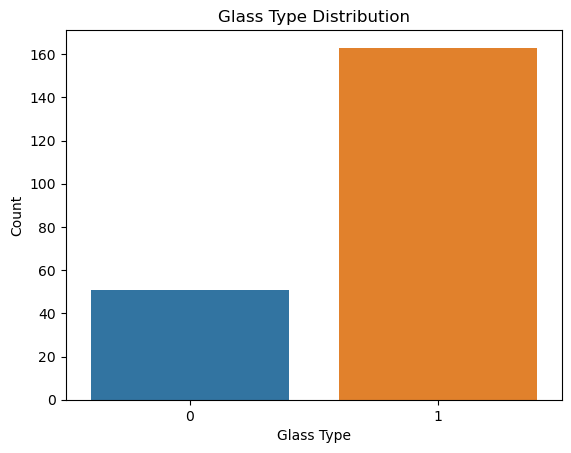

In [24]:
# Bar Plot
sns.countplot(data=df, x='glass_type')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.title('Glass Type Distribution')
plt.show()

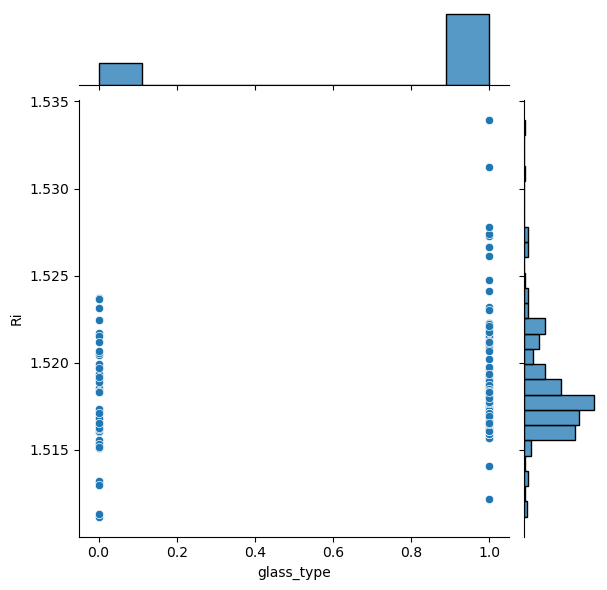

In [29]:
sns.jointplot(x="glass_type",y="Ri",data=df)

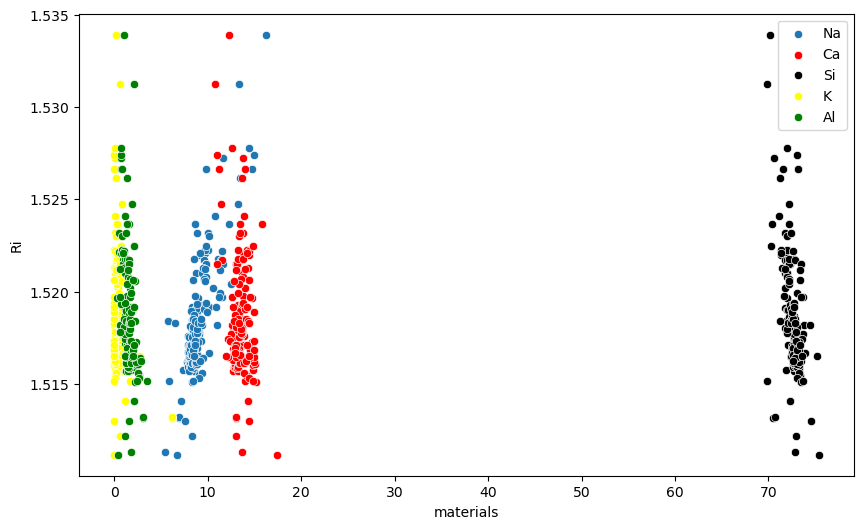

In [31]:
dr=df[["Na","Ca","Si","K","Al"]]
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Ca"],y="Ri",data=df)
sns.scatterplot(x=df["Na"],y="Ri",data=df,color="red")
sns.scatterplot(x=df["Si"],y="Ri",data=df,color="black")
sns.scatterplot(x=df["K"],y="Ri",data=df,color="yellow")
sns.scatterplot(x=df["Al"],y="Ri",data=df,color="green")
plt.xlabel("materials")
plt.legend(df[["Na","Ca","Si","K","Al"]])

In [33]:
df_1=df[df["glass_type"]==1]["Ri"]
df_2=df[df["glass_type"]==0]["Ri"]

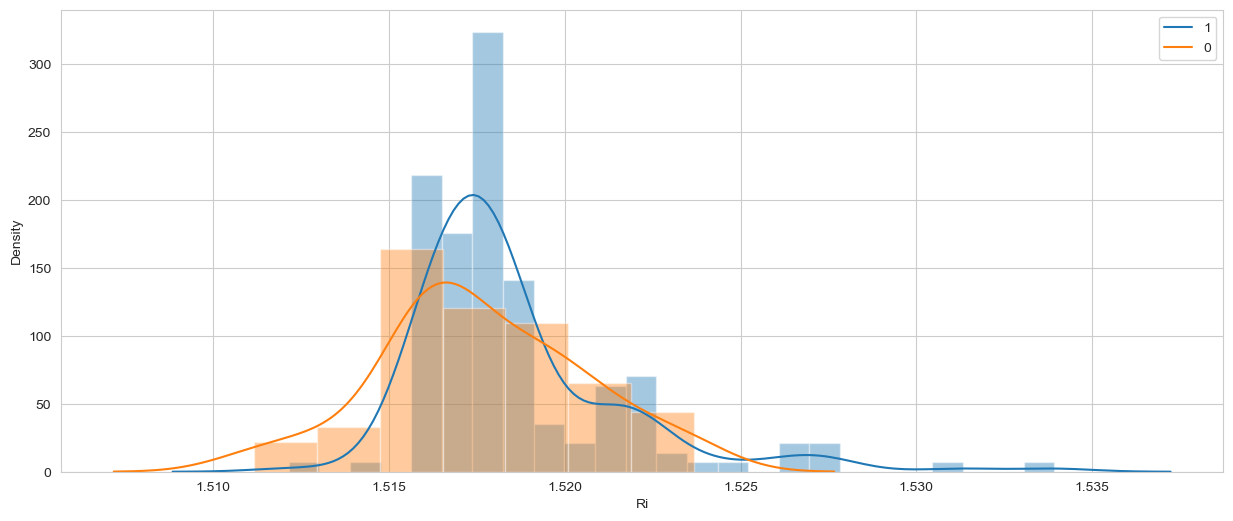

In [34]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.distplot(df_1)
sns.distplot(df_2)
plt.legend(df["glass_type"].unique())

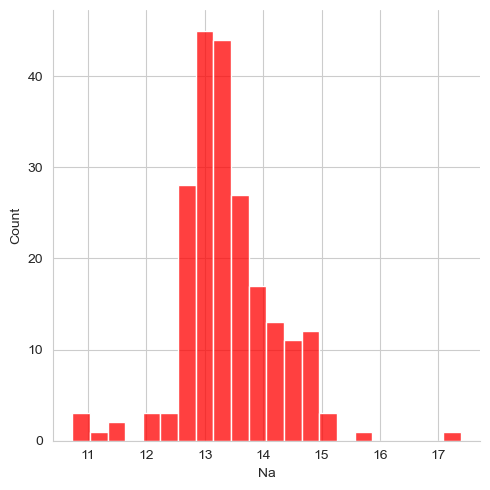

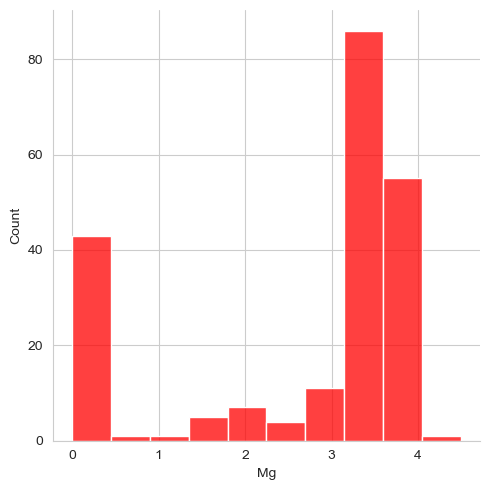

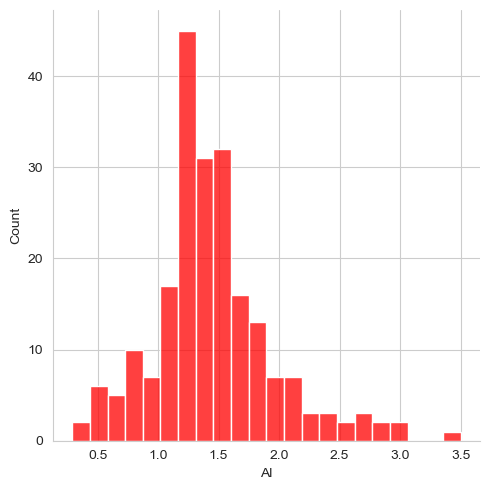

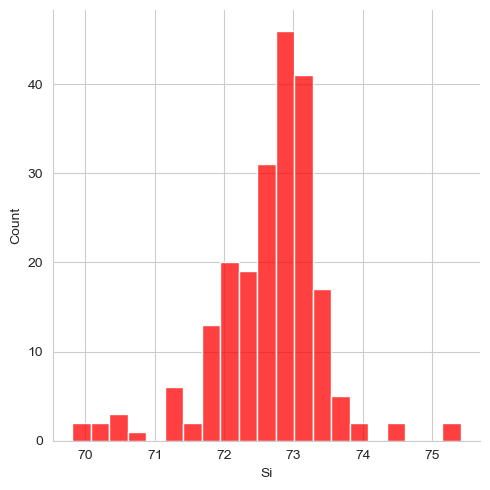

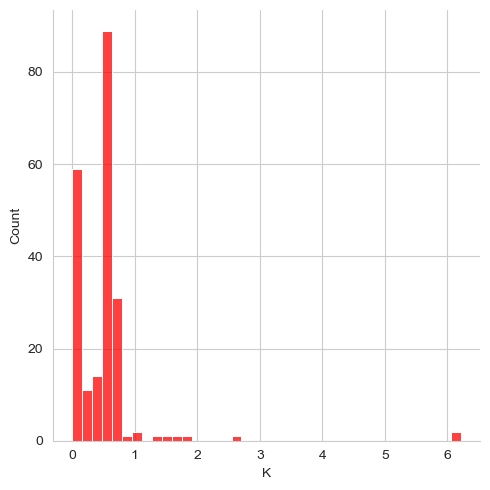

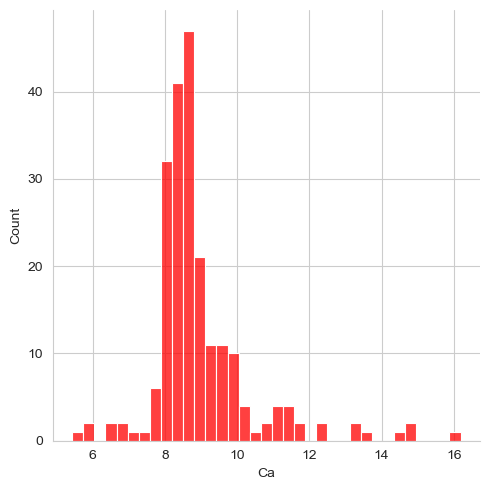

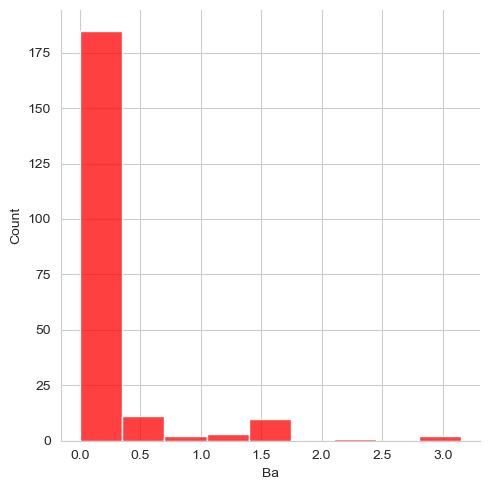

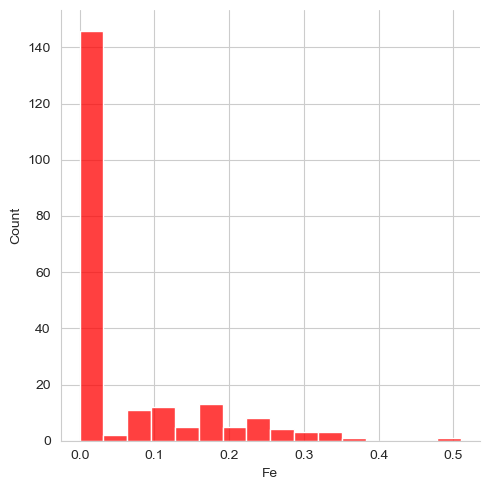

In [35]:
sns.displot(df["Na"],
             color="red")
sns.displot(df["Mg"],
             color="red")
sns.displot(df["Al"],
             color="red")
sns.displot(df["Si"],
             color="red")
sns.displot(df["K"],
             color="red")
sns.displot(df["Ca"],
             color="red")
sns.displot(df["Ba"],
             color="red")
sns.displot(df["Fe"],
             color="red")

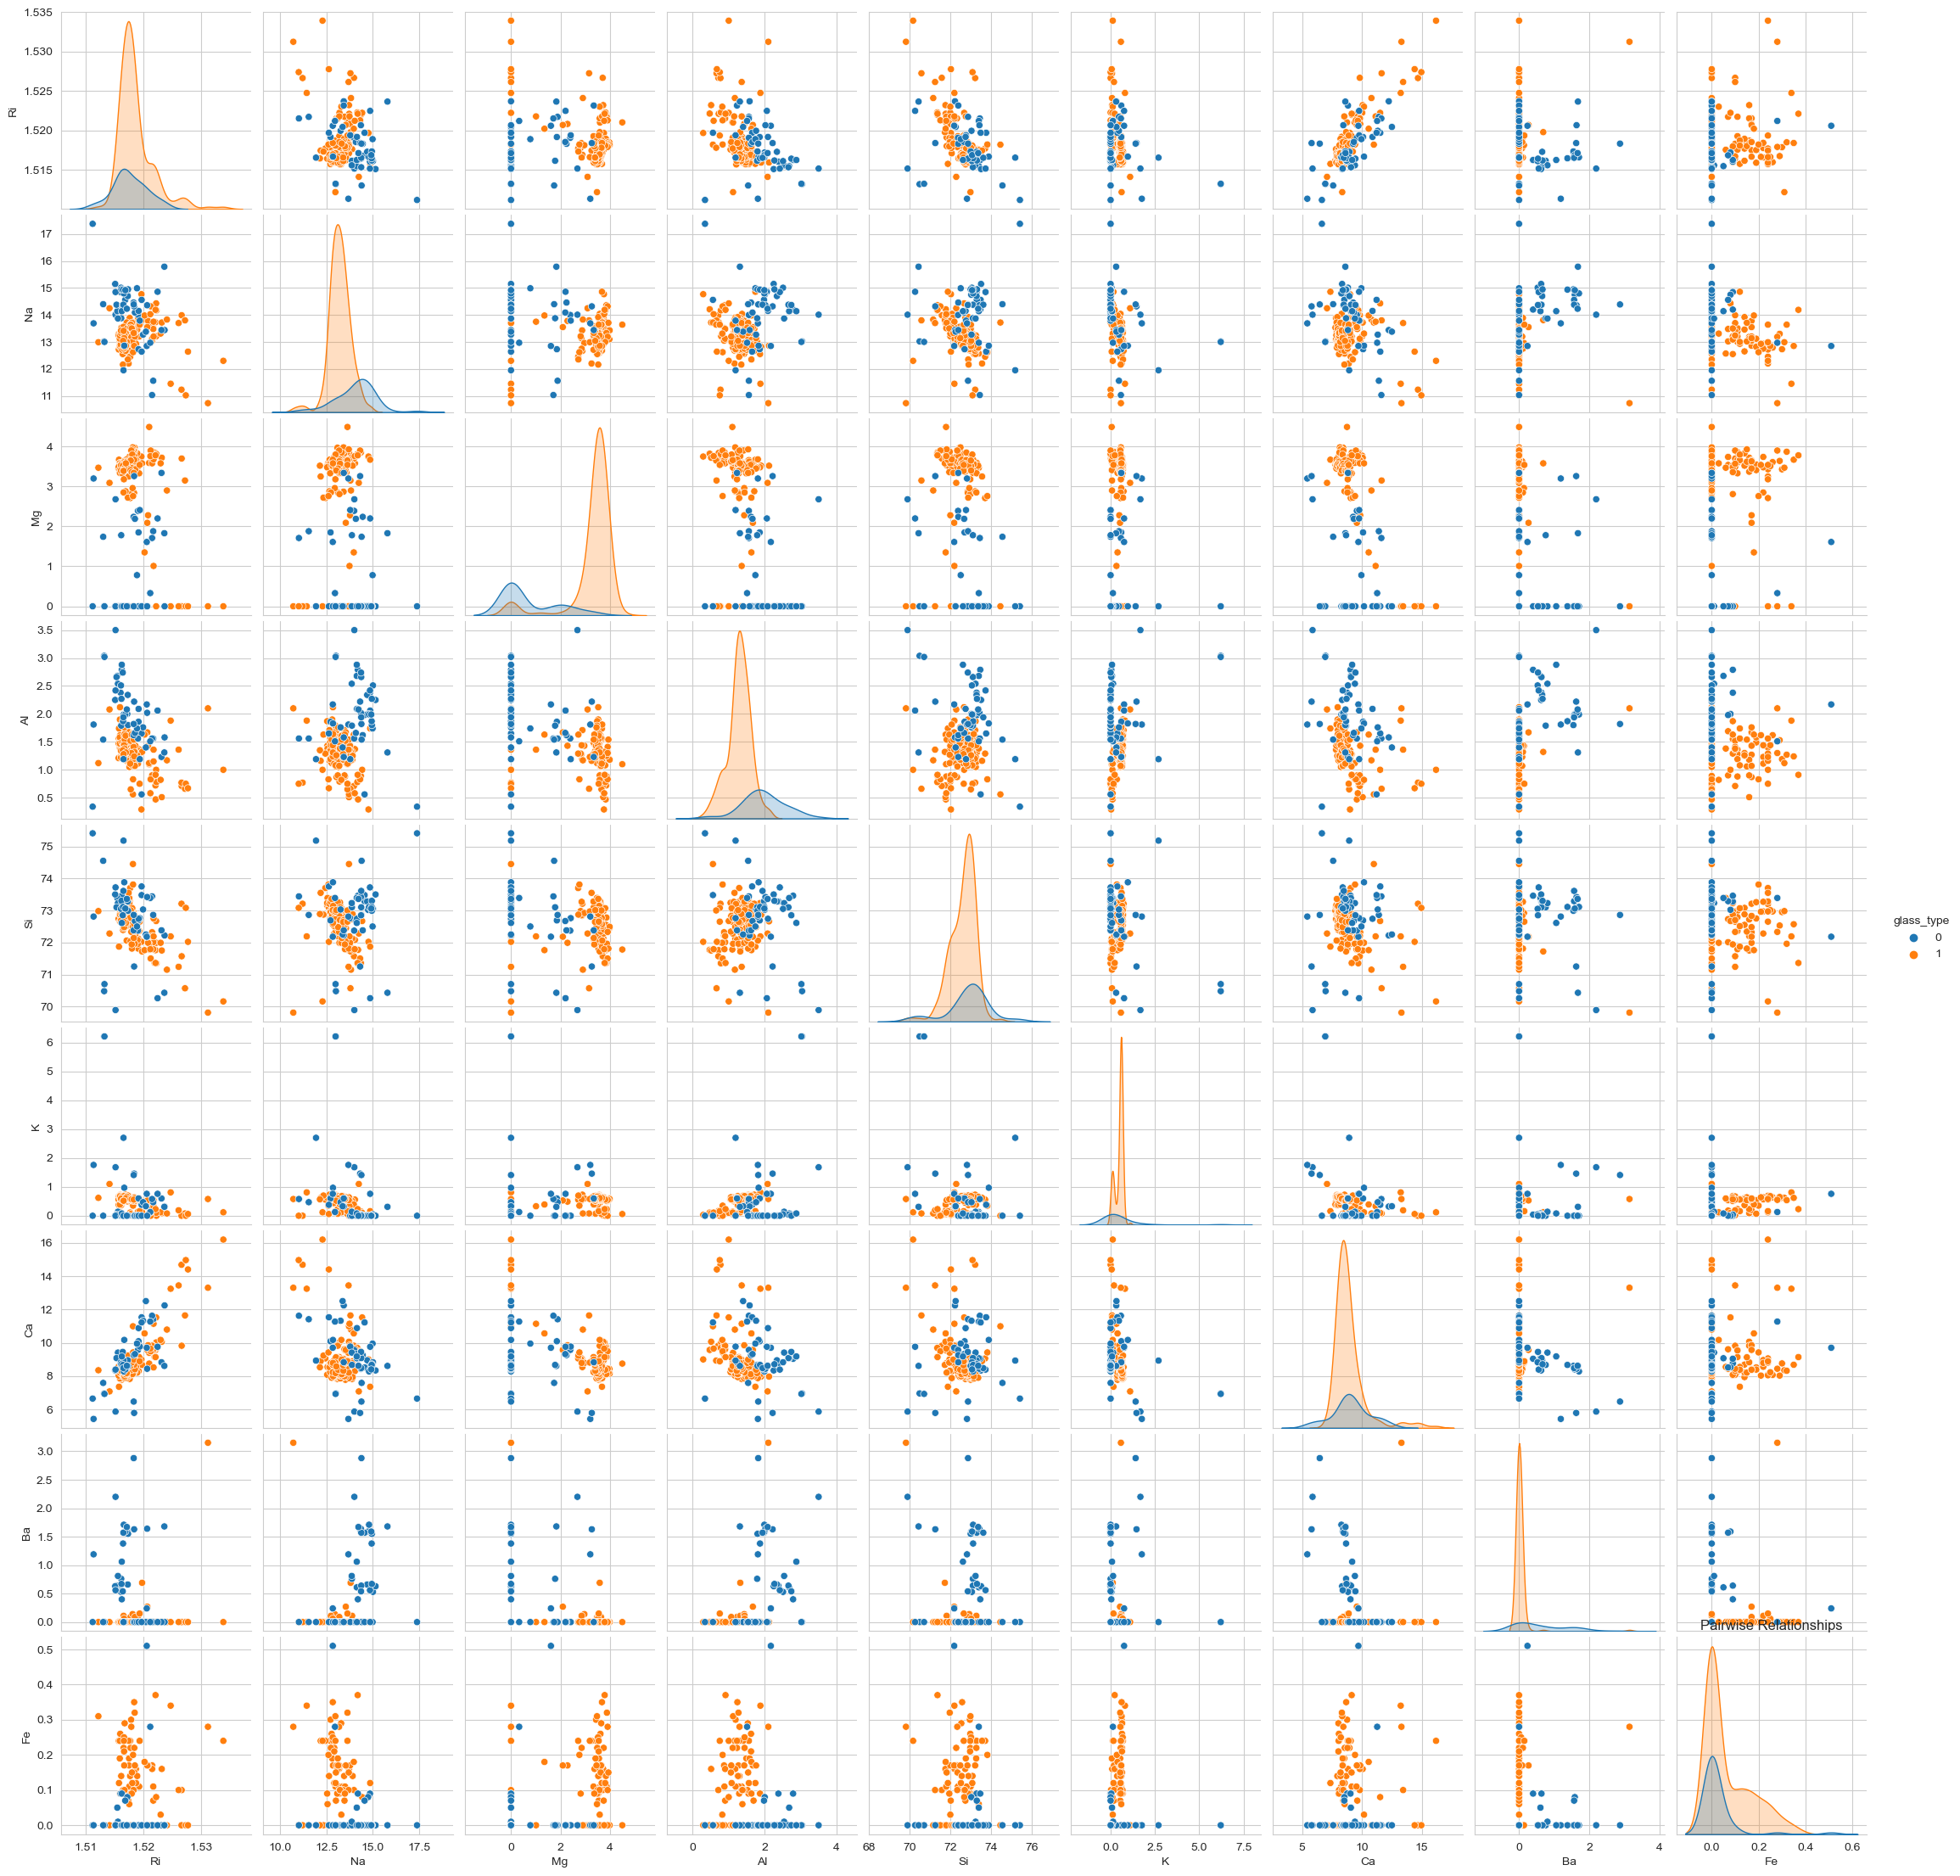

In [36]:
# Pair Plot
sns.pairplot(df, hue='glass_type')
plt.title('Pairwise Relationships')
plt.show()

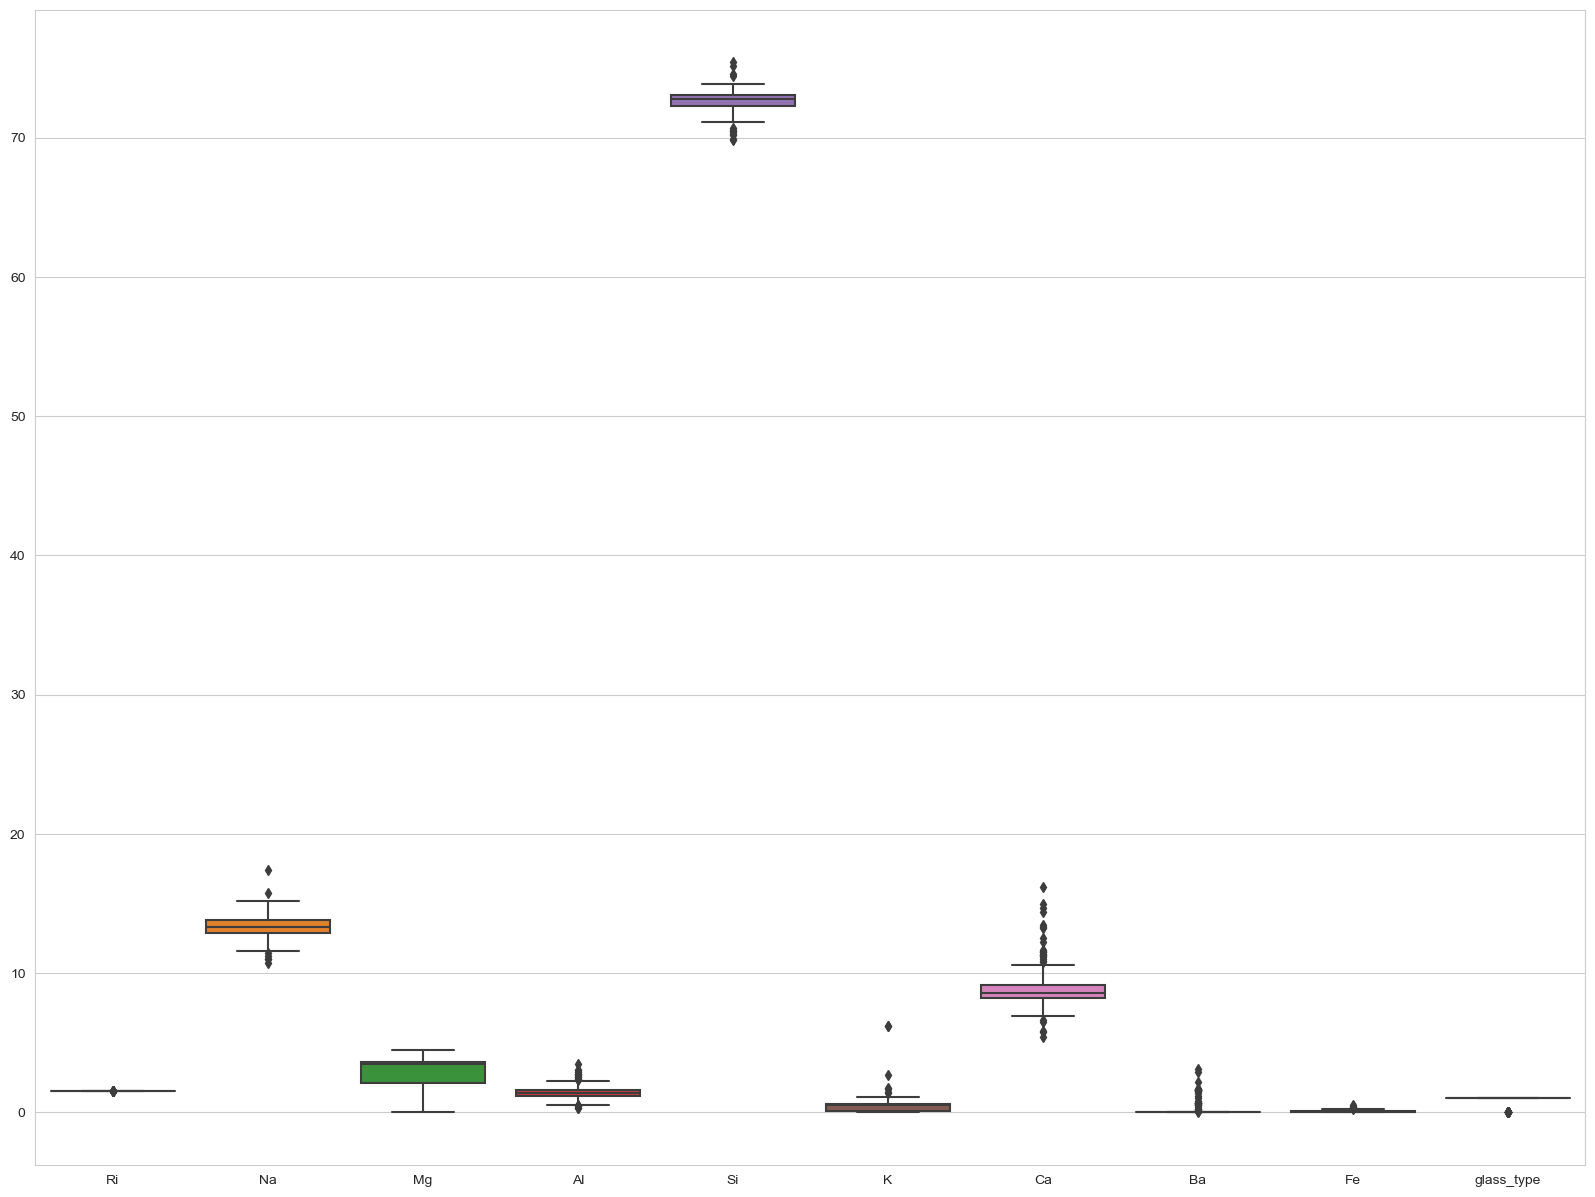

In [37]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df[df.columns])  # Pass the DataFrame directly to the `data` parameter
plt.show()

Observatiom:

there are some outliers are present in my dataset

In [38]:
#Handling Outliers with the help of Z score

from scipy import stats

z = abs(stats.zscore(df))

#np.where(z > 3)

df = df[(z < 3).all(axis=1)]

df.shape

(194, 10)

Observation:

here i removed the outliers with the zscore here i have taken threshold value = 3

In [39]:
#Checking Correlation



#schecking correlation
df_corr = df.corr()
df_corr

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
Ri,1.000000,0.050760,0.048147,-0.522197,-0.609011,-0.368238,0.690650,-0.193013,-0.020046,0.060410
Na,0.050760,1.000000,-0.487729,0.253127,-0.234718,-0.612183,0.019987,0.532000,-0.209838,-0.463723
Mg,0.048147,-0.487729,1.000000,-0.593457,-0.377464,0.482622,-0.455582,-0.586581,0.134065,0.840407
Al,-0.522197,0.253127,-0.593457,1.000000,0.335262,0.005827,-0.213304,0.532061,-0.117764,-0.600752
Si,-0.609011,-0.234718,-0.377464,0.335262,1.000000,0.072579,-0.165712,0.155017,0.023279,-0.282746
K,-0.368238,-0.612183,0.482622,0.005827,0.072579,1.000000,-0.500579,-0.253790,0.099394,0.396495
Ca,0.690650,0.019987,-0.455582,-0.213304,-0.165712,-0.500579,1.000000,-0.167843,-0.011635,-0.288044
Ba,-0.193013,0.532000,-0.586581,0.532061,0.155017,-0.253790,-0.167843,1.000000,-0.119955,-0.618309
Fe,-0.020046,-0.209838,0.134065,-0.117764,0.023279,0.099394,-0.011635,-0.119955,1.000000,0.207574
glass_type,0.060410,-0.463723,0.840407,-0.600752,-0.282746,0.396495,-0.288044,-0.618309,0.207574,1.000000


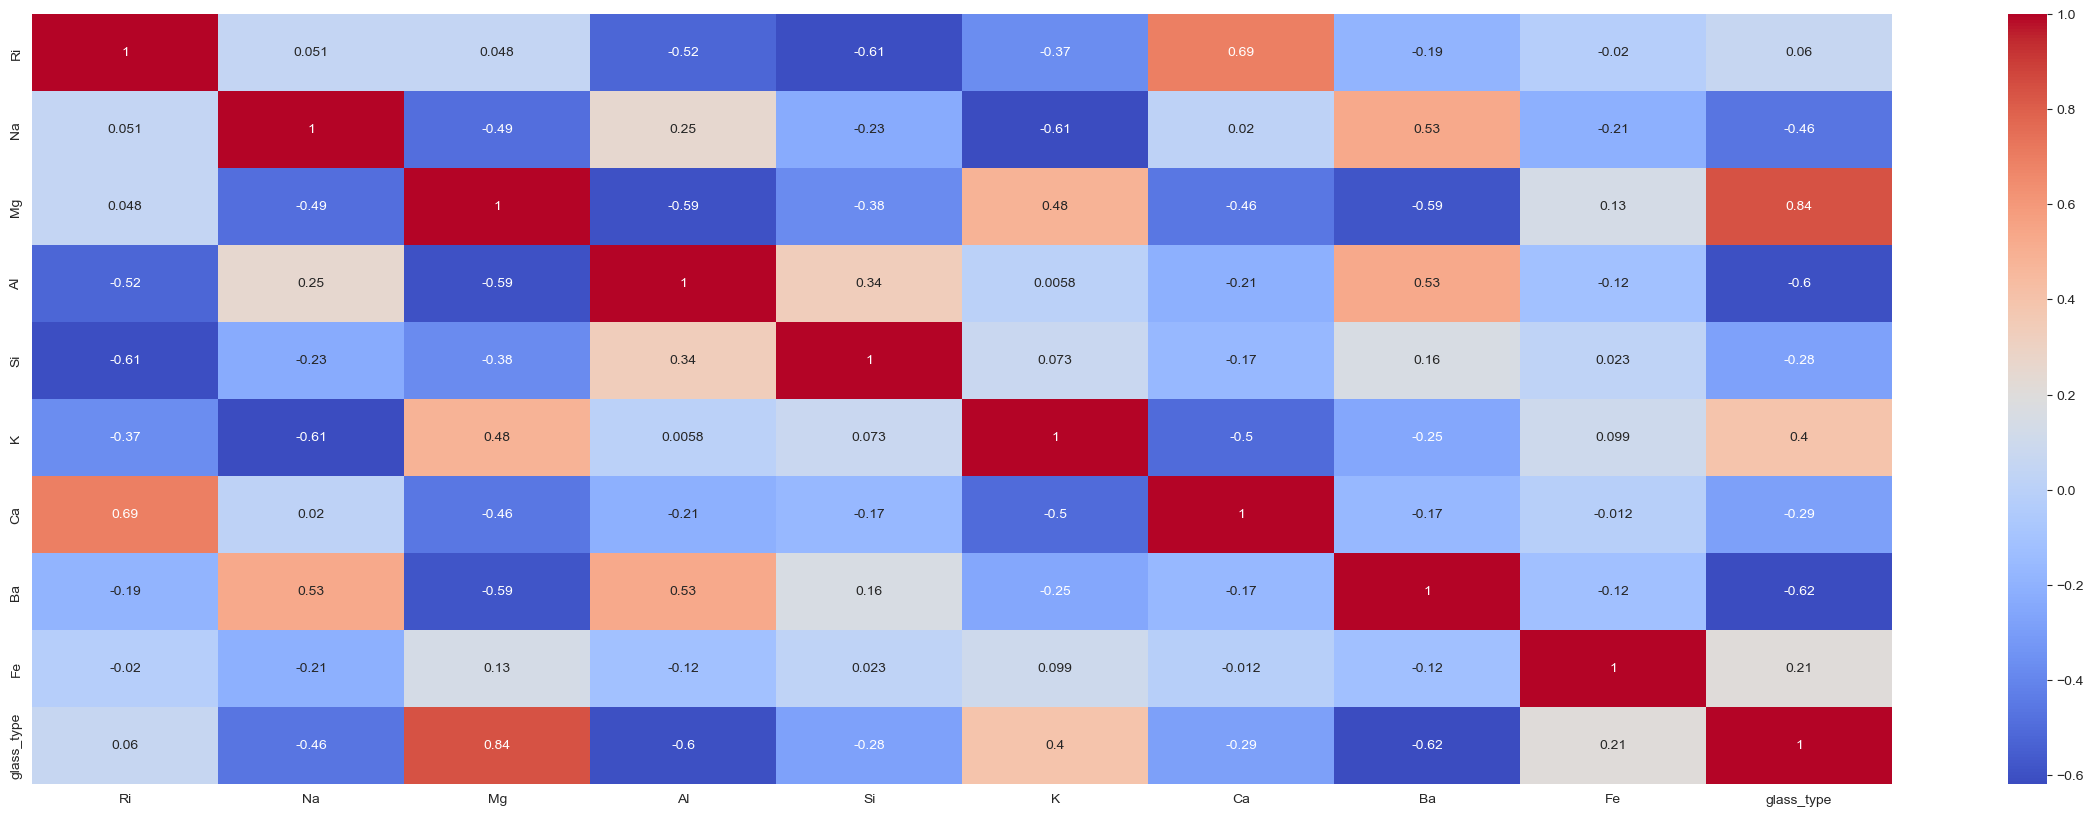

In [40]:
plt.figure(figsize=(30, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

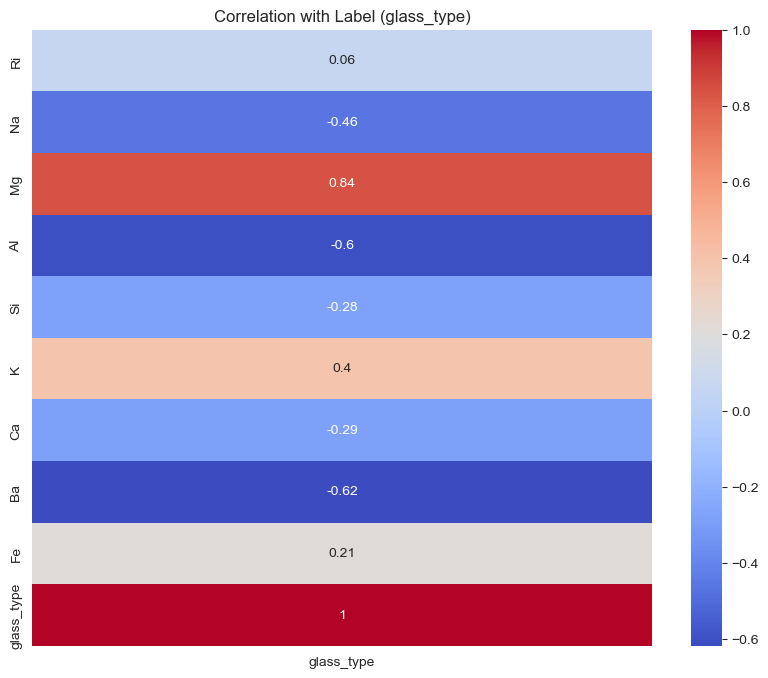

In [41]:
plt.figure(figsize=(10, 8))
corr_with_label = df.corr()["glass_type"]  
sns.heatmap(corr_with_label.to_frame(), annot=True, cmap="coolwarm")
plt.title('Correlation with Label (glass_type)')
plt.show()

In [42]:
df.columns

Index(['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type'], dtype='object')

In [44]:
#Scaling data Using StandardScaler

scaler = StandardScaler()
features_to_scale =['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba']
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = df.copy()
scaled_df[features_to_scale] = scaled_features

In [45]:
scaled_df

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,0.0,1
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,0.0,1
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,0.0,1
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,0.0,1
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,0.0,0
209,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,0.0,0
210,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,0.0,0
211,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,0.0,0


In [46]:
#Deviding into Feature and Label

X = scaled_df.drop('glass_type', axis = 1)
y = scaled_df['glass_type']

In [47]:
#Data Balancing Using SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [48]:
y_resampled.value_counts()

1    154
0    154
Name: glass_type, dtype: int64

Observation:

Data is Balanced

# Train Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)


# Model Training
Logistic Regression with Hyperparameter Tuning

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        31

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62

Cross-Validation Scores: [0.82051282 0.84615385 0.87179487 0.87179487 0.97368421]
Mean Cross-Validation Score: 0.8767881241565452


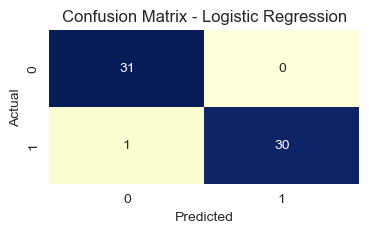

ROC AUC Score: 0.991675338189386


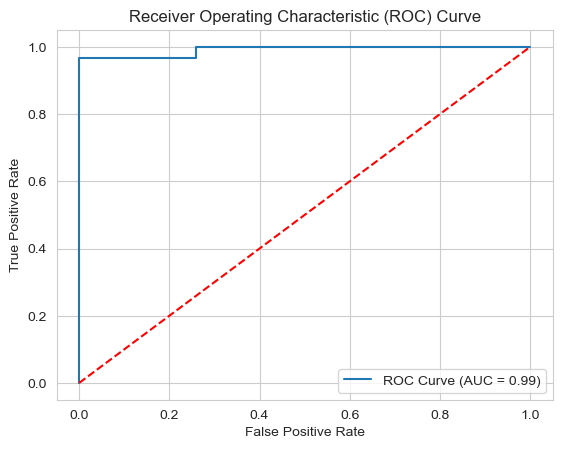

In [50]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)


# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier with Hyperparameter Tuning

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Cross-Validation Scores: [0.94871795 0.87179487 0.8974359  0.94871795 1.        ]
Mean Cross-Validation Score: 0.9333333333333333


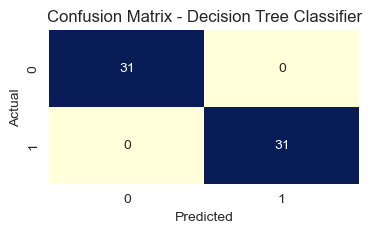

ROC AUC Score: 1.0


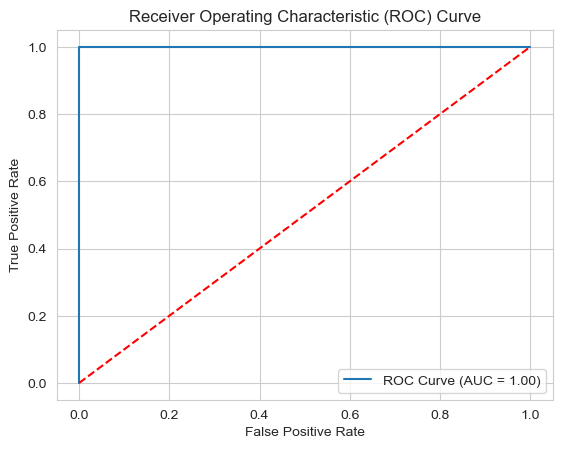

In [51]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier with Hyperparameter Tuning

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Cross-Validation Scores: [0.79487179 0.8974359  0.92307692 0.8974359  0.97368421]
Mean Cross-Validation Score: 0.8973009446693657


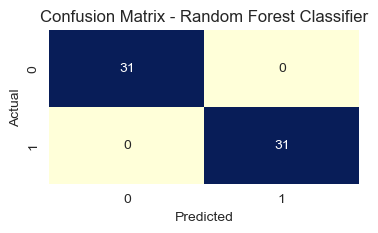

ROC AUC Score: 1.0


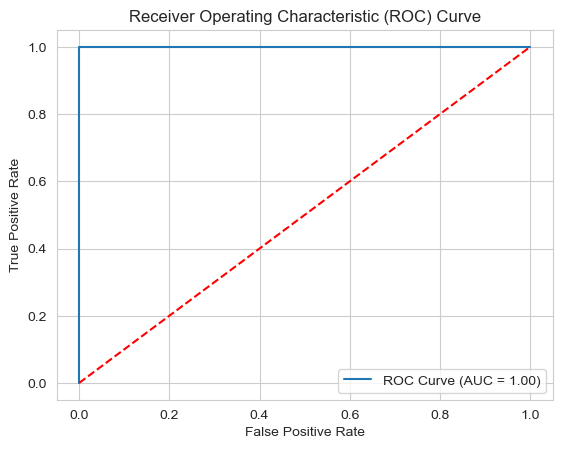

In [52]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC AUC Score
y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Extra Tree Classifier with Hyperparameter Tuning

Extra Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Cross-Validation Scores: [0.79487179 0.87179487 0.8974359  0.8974359  0.97368421]
Mean Cross-Validation Score: 0.8870445344129554


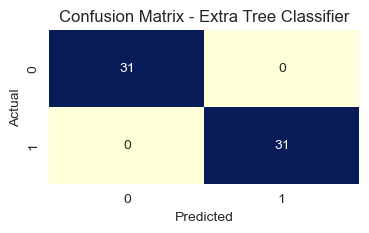

ROC AUC Score: 1.0


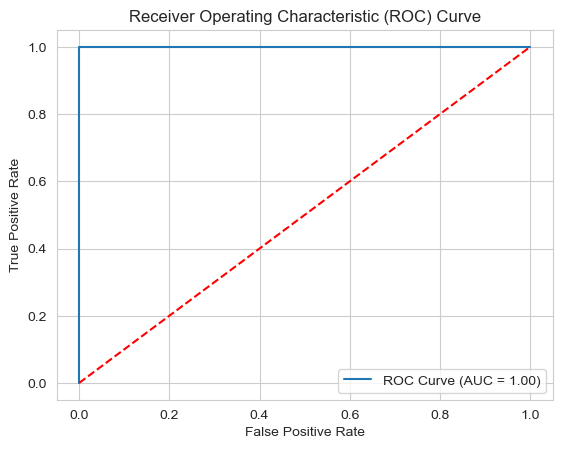

In [53]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Extra Trees Classifier
ET = ExtraTreesClassifier()

# Create the grid search object
grid_search = GridSearchCV(ET, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Create the Extra Trees Classifier with the best parameters
best_ET = ExtraTreesClassifier(**best_params)

# Fit the model on the training data
best_ET.fit(X_train, y_train)

# Make predictions on the test set
ET_y_pred = best_ET.predict(X_test)

print("Extra Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, ET_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_ET, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)


# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, ET_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Extra Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
y_prob = best_ET.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# XGBoost Classifier with Hyperparameter Tuning

XGBoost Classifier :
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Cross-Validation Scores: [1.         0.80645161 0.81048387 1.         1.        ]
Mean Cross-Validation Score: 0.9233870967741936


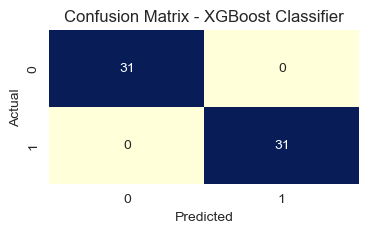

ROC AUC Score: 1.0


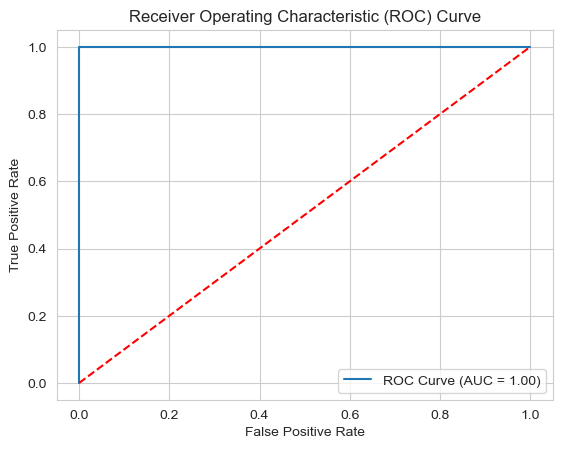

In [54]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost classifier
XGB = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(XGB, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the XGBoost classifier with the best parameters
best_XGB = XGBClassifier(**best_params)

# Fit the model on the training data and make prediction on test data
best_XGB.fit(X_train, y_train)
XGB_y_pred = best_XGB.predict(X_test)

print("XGBoost Classifier :")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, XGB_y_pred))


# Cross-Validation Score
scores = cross_val_score(best_XGB, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, XGB_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute ROC AUC score
y_prob = best_XGB.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Support Vector Classifier with Hyperparameter Tuning

Support Vector Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        31

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62

Cross-Validation Scores: [0.87179487 0.82051282 0.82051282 0.87179487 0.97368421]
Mean Cross-Validation Score: 0.8716599190283401


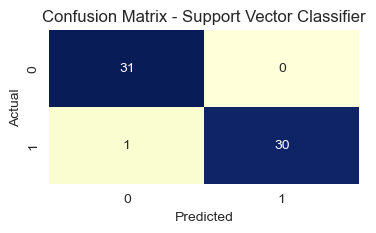

ROC AUC Score: 0.991675338189386


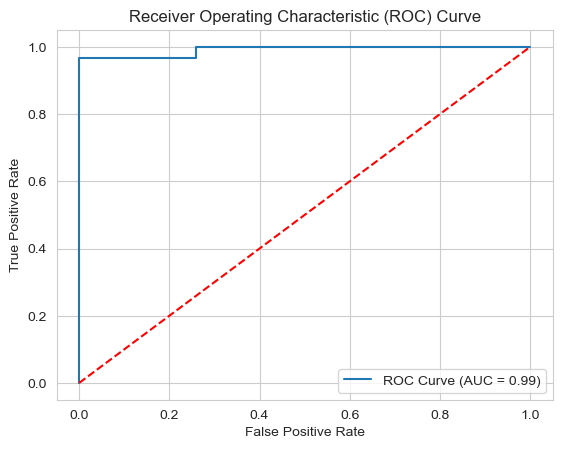

In [55]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVC
SV = SVC()

# Create the grid search object
grid_search = GridSearchCV(SV, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the SVC with the best parameters
best_SV = SVC(**best_params)

# Fit the model on the training data
best_SV.fit(X_train, y_train)

# Make predictions on the test set
SV_y_pred = best_SV.predict(X_test)

print("Support Vector Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, SV_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_SV, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, SV_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC AUC Score
y_prob = best_SV.decision_function(X_test)
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# K Neighbour Classifier with Hyperparameter Tuning

K Neighbors Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Cross-Validation Scores: [0.84615385 0.84615385 0.8974359  0.92307692 0.97368421]
Mean Cross-Validation Score: 0.8973009446693657


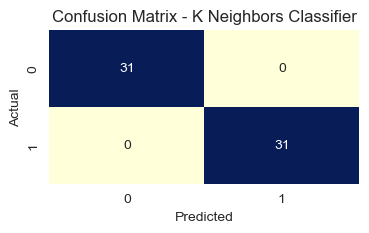

ROC AUC Score: 1.0


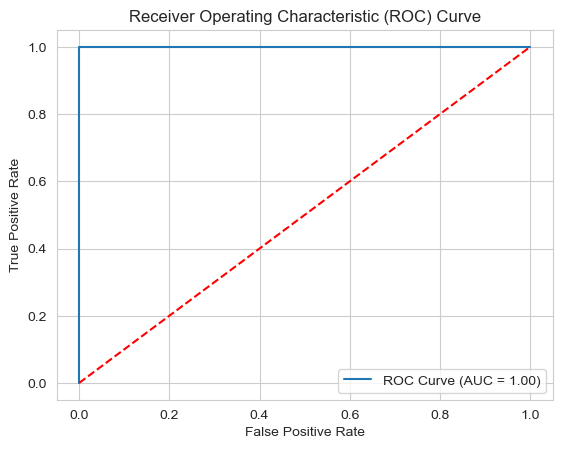

In [57]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Classifier
KN = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(KN, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the K Neighbors Classifier with the best parameters
best_KN = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_KN.fit(X_train, y_train)

# Make predictions on the test set
KN_y_pred = best_KN.predict(X_test)

print("K Neighbors Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, KN_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_KN, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, KN_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - K Neighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
y_prob = best_KN.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Creating DataFrame of All models

In [58]:
# Create a list of model names
model_names = ['Extra Tree Classifier', 'Support Vector Classifier', 'K Neighbour Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression','XGBoost Classifier']

# Create a list of models and their corresponding accuracy scores
models = [ET, SV, KN, RF, dt, LG]
accuracy_scores = [accuracy_score(y_test, ET_y_pred), accuracy_score(y_test, SV_y_pred), accuracy_score(y_test, KN_y_pred), accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred),accuracy_score(y_test, XGB_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)

                  Model Name  Accuracy Score
1      Extra Tree Classifier        1.000000
2     K Neighbour Classifier        1.000000
3   Random Forest Classifier        1.000000
4   Decision Tree Classifier        1.000000
5         XGBoost Classifier        1.000000
6  Support Vector Classifier        0.983871
7        Logistic Regression        0.983871


In [59]:
#Save Best Model

filename = 'Extra_tree_classifier.pkl'
pickle.dump(ET, open(filename, 'wb'))